In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
from sklearn.preprocessing import , PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from transforms import BinaryEncoder, IdentityTransform
np.random.seed(43)

In [2]:
feature_names = ["school", "sex", "age", "address", "famsize", "Pstatus",
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian",
                 "traveltime", "studytime", "failures", "schoolsup", "famsup",
                 "paid", "activities", "nursery", "higher", "internet", "romantic",
                 "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", ]

feature_names = np.array(feature_names)

In [3]:
datapoints, labels, feature_info, categories = utils.read_data(
    "datasets/student_performance_train.csv",
    "datasets/student_performance_feature.txt")
test_data, test_labels, _, _ = utils.read_data(
    "datasets/student_performance_test.csv",
    "datasets/student_performance_feature.txt")

labels_g1 = labels[:, 0].copy()
test_labels_g1 = test_labels[:, 0].copy()

In [5]:
ct = ColumnTransformer([
    ("BinaryEncoder", BinaryEncoder(),
     np.where(feature_info == "binary")[0]),
    ("Identity",
     IdentityTransform(),
     np.where(feature_info == "numeric")[0]),
    ("OneHotEncoder", OneHotEncoder(),
     np.where(feature_info == "nominal")[0]),
    ("PolynomialTransform", PolynomialFeatures(),
     np.where(feature_info == "numeric")[0])
])

ct.fit(datapoints)
datapoints_pp = ct.transform(datapoints)

In [7]:
datapoints_pp

array([[1, 1, 0, ..., 4.0, 0.0, 0.0],
       [1, 0, 1, ..., 25.0, 0.0, 0.0],
       [1, 0, 1, ..., 25.0, 15.0, 9.0],
       ...,
       [1, 1, 1, ..., 1.0, 8.0, 64.0],
       [1, 1, 1, ..., 25.0, 20.0, 16.0],
       [0, 0, 1, ..., 25.0, 0.0, 0.0]], dtype=object)

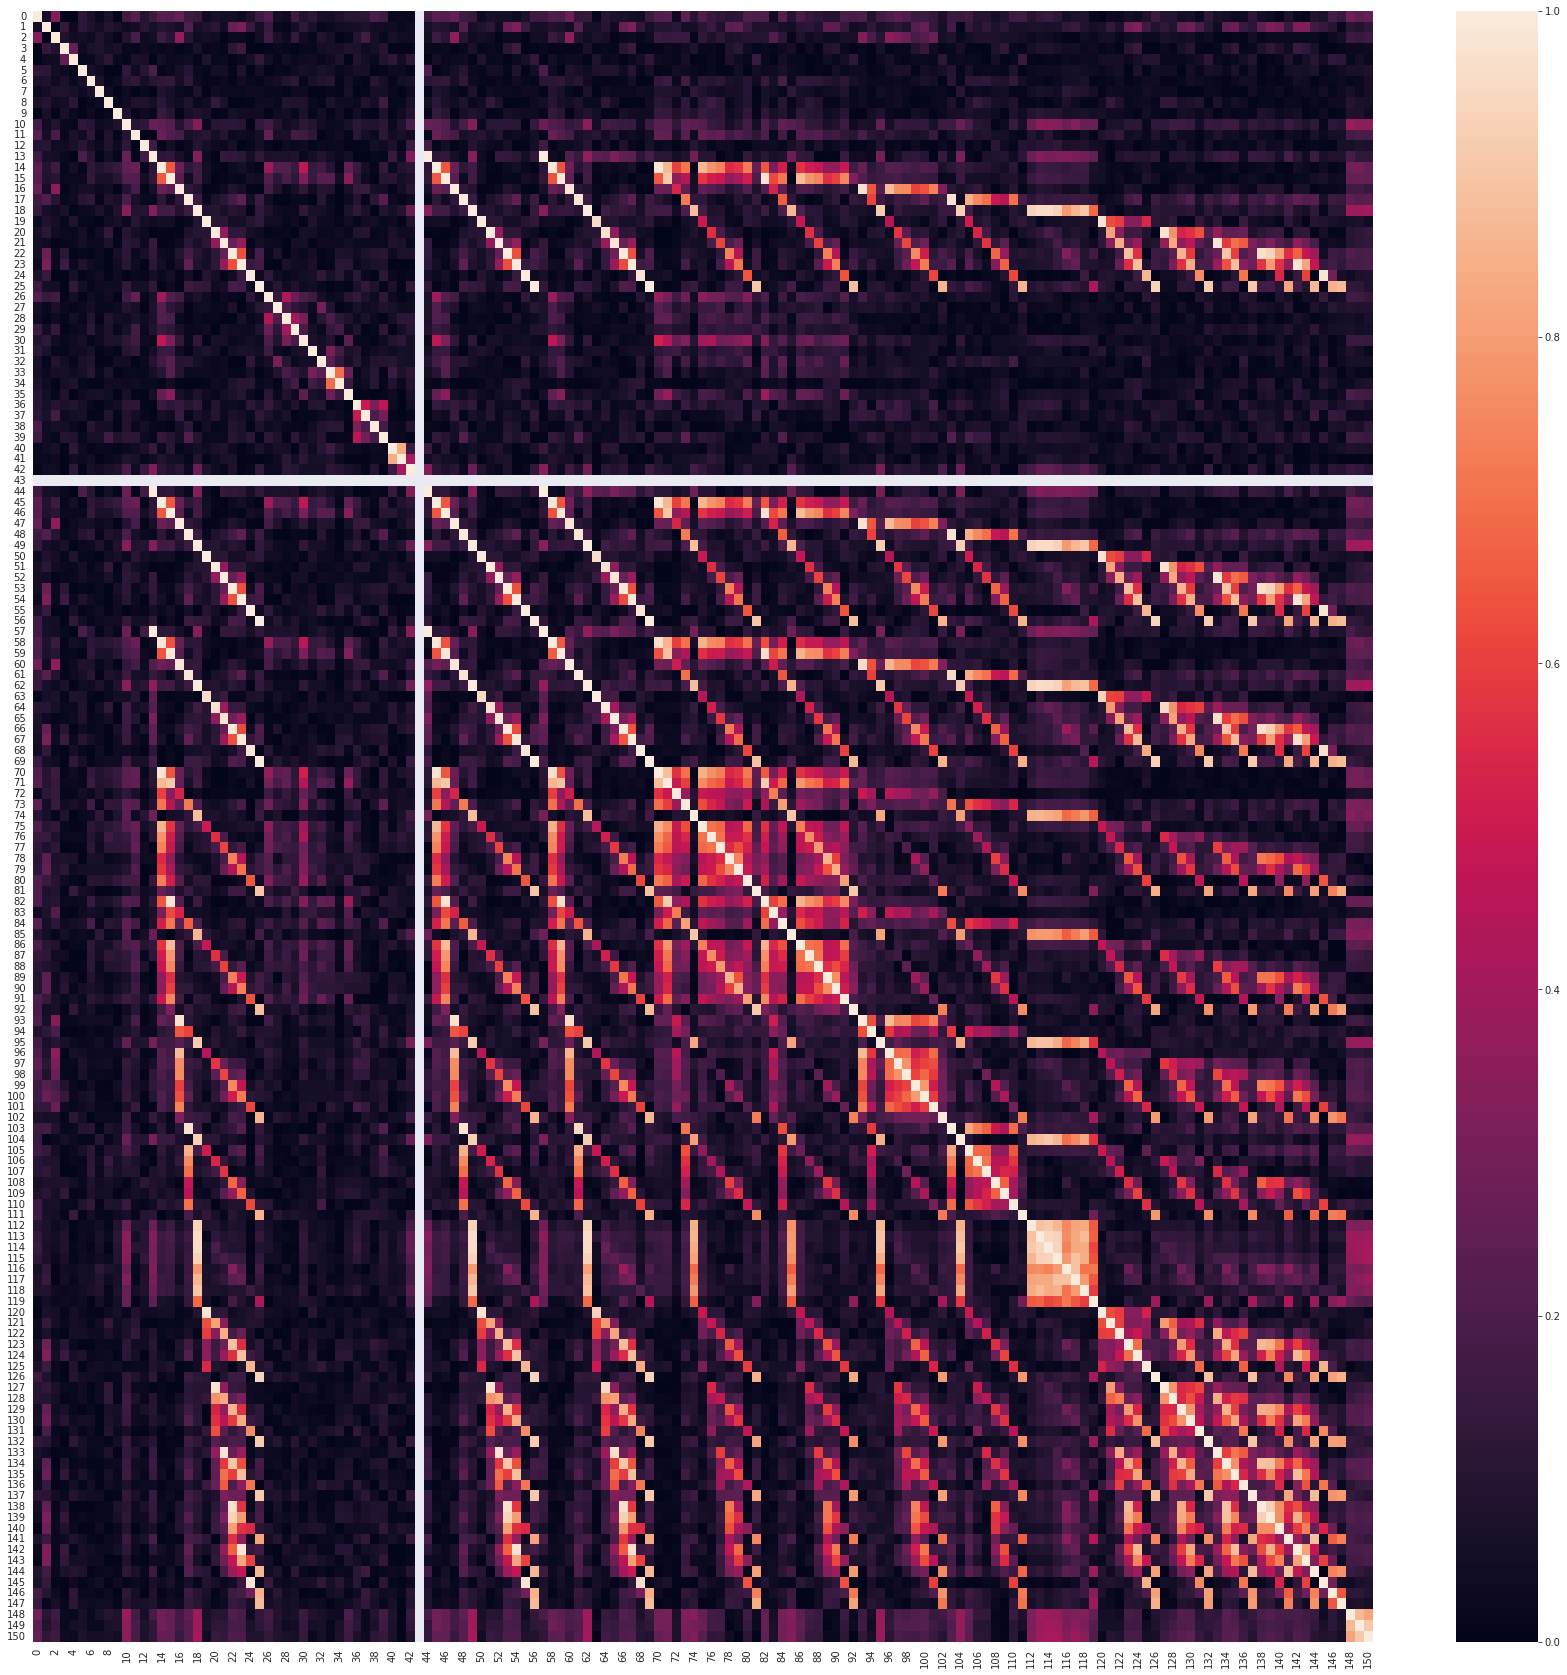

In [11]:
# Create a figure
fig = plt.figure()
fig.set_size_inches(30, 30)

# Create an array to store all the data
all_data = np.append(datapoints_pp, labels, axis=1)

# Calculate correlation between all the features and the output
# and get the absolute value of the correlation
corr = np.corrcoef(all_data.astype(float), rowvar=False)
p_corr = abs(corr)

# Plot a heatmap of the correlation
sns.heatmap(p_corr)
plt.savefig("plots/observations/polynomial_features.png", dpi=100)